In [2]:
import mysql.connector
import numpy as np
import pickle

def get_db_connection():
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="food_img_search"
    )
    return conn

In [2]:
def get_feature_vectors():
    conn = get_db_connection()
    cursor = conn.cursor()
    query = """SELECT id, feature FROM food_imgs"""
    cursor.execute(query)
    rows = cursor.fetchall()
    
    ids = []
    feature_vectors = []
    for row in rows:
        id = row[0]
        ids.append(id)
        feature_blob = row[1]
        feature_vector = pickle.loads(feature_blob)
        feature_vectors.append(np.array(feature_vector))
    
    return ids,feature_vectors

ids, features =get_feature_vectors()
print(len(ids))

10500


In [1]:
import os

# Đường dẫn đến thư mục chứa các file cần đổi tên
folder_path = r'data\QA\New folder'

# Lấy danh sách tất cả các file trong thư mục
files = os.listdir(folder_path)

# Số thứ tự bắt đầu từ 131
stt = 131

# Lặp qua tất cả các file trong thư mục
for file_name in files:
    # Tạo tên file mới
    new_file_name = f"thit_nuong_{stt}"
    
    # Lấy phần mở rộng của file cũ
    file_ext = os.path.splitext(file_name)[1]
    
    # Thêm phần mở rộng vào tên file mới
    new_file_name += file_ext
    
    # Đường dẫn đầy đủ của file cũ và file mới
    old_file_path = os.path.join(folder_path, file_name)
    new_file_path = os.path.join(folder_path, new_file_name)
    
    # Đổi tên file
    os.rename(old_file_path, new_file_path)
    
    # Tăng số thứ tự lên 1 cho file kế tiếp
    stt += 1

print("Đổi tên file thành công!")


Đổi tên file thành công!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


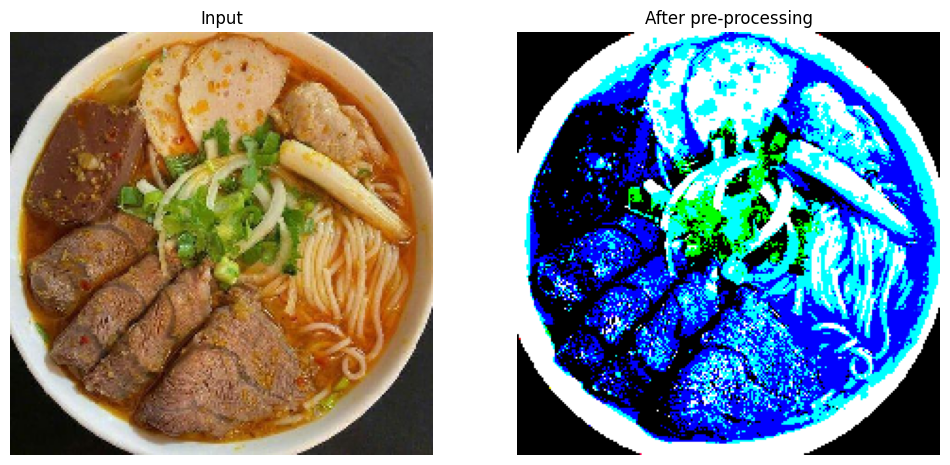

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import DirectoryIterator
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Kích thước ảnh đầu vào 224x224
img_width, img_height = 224,224

# Khởi tạo mô hình ResNet50 và bỏ đi lớp fully connected (top layer)
model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

def plot_preprocessed_image(image_path):
    # Load the original image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    
    # Convert it to a NumPy array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    pre_pro_img_array = preprocess_input(img_array)
    
    # Plot the original image
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Input")
    plt.axis('off')
    
    # Pre-processed image
    plt.subplot(1, 2, 2)
    plt.imshow(pre_pro_img_array[0])
    plt.title("After pre-processing")
    plt.axis('off')
    
    # Show the plot
    plt.show()

# Call the function with your image path
n = r"E:\internship\data\images\bun_bo_hue_36.jpg"
plot_preprocessed_image(n)


In [3]:
# Trích xuất đặc trưng từ mô hình ResNet50
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features.flatten()

vector = extract_features(n)
len(vector)

100352